In [41]:
import numpy as np
import matplotlib.pyplot as plt

In [42]:
import os
import shutil
import time

# Plot Space average of u(t)

In [43]:
dt = 0.1
tspan = 110
tspan/dt

1100.0

In [44]:
dx = 0.1
L = 100

In [45]:
title = "2D Fast Oscillations\n$C = 1 + 0.1*sin(2\pi t/T)$\n$T=1/25$\ndt = " + str(dt)

Text(0.5, 1.0, '2D Fast Oscillations\n$C = 1 + 0.1*sin(2\\pi t/T)$\n$T=1/25$\ndt = 0.1')

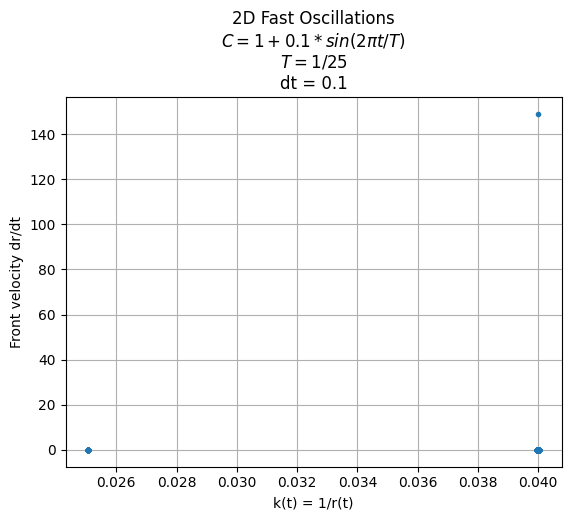

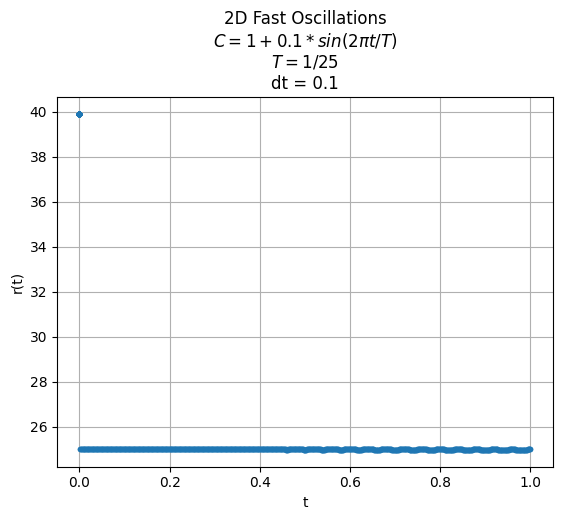

In [46]:
f = open("../fileAveout.dat", "r")
N = int(round(tspan/dt))
tt = np.zeros(N)
ave = np.zeros(N)

i = 0
for row in f:
    a, b = row.split(" ")
    tt[i] = float(a)
    ave[i] = float(b)
    #print(ave[i])
    i = i + 1

if(N-i != 0):
    print("WARNING: dt or tspan is incorrect!")

area = (ave+np.ones(N))*L**2/2
k = np.zeros(len(area))
r = np.zeros(len(area))
drdt = np.zeros(len(area)-1)
r[0] = np.sqrt(area[0]/np.pi)
k[0] = 1/r[0]
for i in np.arange(0, len(area)-1):
    r[i+1] = np.sqrt(area[i+1]/np.pi)
    drdt[i] = (r[i+1]-r[i])/dt
    k[i+1] = 1/r[i+1]
    #print(str(area[i]) + " " + str(i))

ns = np.arange(0,i)
#ts = np.arange(0, i, int(T/dt))

# Motion by curvature
fig, ax = plt.subplots()
ax.plot(k[ns], drdt[ns],'.')
#plt.ylim(0)

ax.set_xlabel("k(t) = 1/r(t)")
ax.set_ylabel("Front velocity dr/dt")
#plt.yscale("linear")
ax.grid()
ax.set_title(title)
#ax.set_xlim(1/23,1/20)
#ax.set_ylim(-1,-0.2)

# Radius as function of time
fig2, ax2 = plt.subplots()
ax2.plot(tt[ns], r[ns],'.')
#plt.ylim(0)

ax2.set_xlabel("t")
ax2.set_ylabel("r(t)")
#ax2.set_xlim(6,8)
#ax2.set_ylim(24,24.2)
#plt.yscale("linear")
ax2.grid()
ax2.set_title(title)



In [47]:
print(drdt[ns])

[-0.00488442 -0.00774485 -0.01041901 ...  0.          0.
  0.        ]


# Plot final state u(x, tmax)

/tmp/ipykernel_6308/1122534620.py:34: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  plt.pcolormesh(X, Y, Z, cmap=plt.cm.get_cmap('Blues'), vmin=-1, vmax=1)


Text(0.5, 1.0, 't = 1.000000')

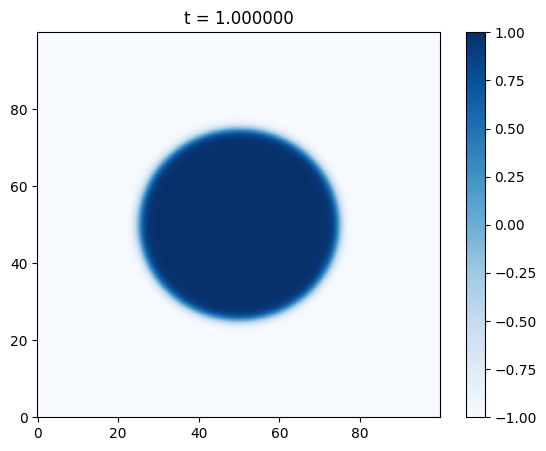

In [48]:
f = open("../state.dat", "r")
N = int(L/dx)
x = np.zeros(N)
y = np.zeros(N)
Z = np.zeros((N,N))
i = 0
for row in f:
    if i != 0:
        a, b, c = row.split(" ")
        #a, b = row.split("	")
        J = np.mod(i-1,N)
        I = int((i-1)/N)
        x[I] = float(a)
        y[J] = float(b)
        Z[I][J] = float(c)
    else:
        N, tmax, dx = row.split(" ")
        dx = float(dx)
        N = int(N)

    i = i + 1

#x = x[0:i-1]
#y = y[0:i-1]

# Make up some fake data
X,Y = np.meshgrid(x,y)

fig = plt.figure(figsize = (6.5,5))
fig.subplots_adjust(wspace=0.3)

# Blues
#plt.figure(figsize=(10,10))
plt.pcolormesh(X, Y, Z, cmap=plt.cm.get_cmap('Blues'), vmin=-1, vmax=1)
plt.colorbar()
#plt.axis([-3, 3, -3, 3])
plt.title('t = ' + str(tmax))